In [109]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from keras.models import Sequential

In [110]:
root_path="C:/Users/DELL/Desktop/pythonproj/dataset_singleseed"
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['ADT37',
 'Andra bpt',
 'IR 20',
 'amman',
 'eramalli',
 'karuppu kavuni',
 'keerthi',
 'mtu 1010',
 'mtu 1290',
 'narmadha',
 'pacha ponni']

In [111]:
file_path ="C:/Users/DELL/Desktop/pythonproj/dataset_singleseed"

In [112]:
filepaths= list(glob.glob(file_path+'/**/*.*'))

In [113]:
print(filepaths[0:2])

['C:/Users/DELL/Desktop/pythonproj/dataset_singleseed\\ADT37\\ADT37 (1).jpg', 'C:/Users/DELL/Desktop/pythonproj/dataset_singleseed\\ADT37\\ADT37 (10).jpg']


In [114]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [115]:
labels

['ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',
 'ADT37',


In [116]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data= data.sample(frac=1).reset_index(drop=True)
data.head(12)

,Filepath,Label
0,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,narmadha
1,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,narmadha
2,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,mtu 1010
3,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,IR 20
4,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,mtu 1010
5,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,ADT37
6,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,IR 20
7,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,mtu 1290
8,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,ADT37
9,C:/Users/DELL/Desktop/pythonproj/dataset_singl...,ADT37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'narmadha'),
  Text(1, 0, 'mtu 1010'),
  Text(2, 0, 'IR 20'),
  Text(3, 0, 'mtu 1290'),
  Text(4, 0, 'eramalli'),
  Text(5, 0, 'sonna masur'),
  Text(6, 0, 'karuppu kavuni'),
  Text(7, 0, 'keerthi'),
  Text(8, 0, 'Andra bpt'),
  Text(9, 0, 'pacha ponni'),
  Text(10, 0, 'amman'),
  Text(11, 0, 'ADT37')])

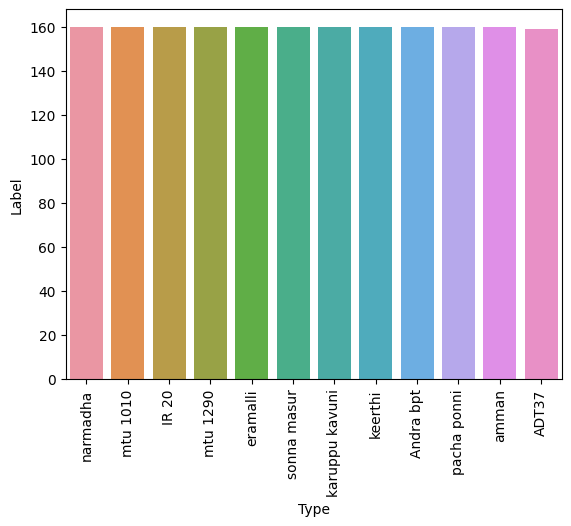

In [117]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [118]:
train, test= train_test_split(data, test_size=0.30, random_state=42)

In [119]:
test, valid = train_test_split(test, test_size=0.5, random_state=42)

In [120]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')

In [121]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=40
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 1343 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.


In [122]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', input_shape=(512, 512, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(12, activation='softmax')
])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [123]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [124]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 152s 7s/step - loss: 2.3929 - accuracy: 0.1653 - val_loss: 2.4442 - val_accuracy: 0.1042
Epoch 2/100
21/21 [==============================] - 136s 7s/step - loss: 2.2470 - accuracy: 0.2204 - val_loss: 2.3902 - val_accuracy: 0.1389
Epoch 3/100
21/21 [==============================] - 275s 13s/step - loss: 2.1321 - accuracy: 0.2844 - val_loss: 2.3328 - val_accuracy: 0.1944
Epoch 4/100
21/21 [==============================] - 374s 18s/step - loss: 2.0417 - accuracy: 0.3246 - val_loss: 2.2882 - val_accuracy: 0.2049
Epoch 5/100
21/21 [==============================] - 454s 22s/step - loss: 1.9948 - accuracy: 0.3254 - val_loss: 2.2486 - val_accuracy: 0.2188
Epoch 6/100
21/21 [==============================] - 452s 22s/step - loss: 1.9456 - accuracy: 0.3425 - val_loss: 2.1804 - val_accuracy: 0.2639
Epoch 7/100
21/21 [==============================] - 461s 22s/step - loss: 1.9298 - accuracy: 0.3477 - val_loss: 2.1393 - val_accuracy: 0.2604
E

21/21 [==============================] - 115s 5s/step - loss: 1.1564 - accuracy: 0.5897 - val_loss: 1.2232 - val_accuracy: 0.5833
Epoch 59/100
21/21 [==============================] - 114s 5s/step - loss: 1.1987 - accuracy: 0.5934 - val_loss: 1.2133 - val_accuracy: 0.5521
Epoch 60/100
21/21 [==============================] - 114s 5s/step - loss: 1.1349 - accuracy: 0.6158 - val_loss: 1.4908 - val_accuracy: 0.5035
Epoch 61/100
21/21 [==============================] - 120s 6s/step - loss: 1.1569 - accuracy: 0.6098 - val_loss: 1.3217 - val_accuracy: 0.5312
Epoch 62/100
21/21 [==============================] - 114s 5s/step - loss: 1.1599 - accuracy: 0.6128 - val_loss: 1.8542 - val_accuracy: 0.4028
Epoch 63/100
21/21 [==============================] - 116s 6s/step - loss: 1.1298 - accuracy: 0.6054 - val_loss: 1.5546 - val_accuracy: 0.4861
Epoch 64/100
21/21 [==============================] - 114s 5s/step - loss: 1.1377 - accuracy: 0.6098 - val_loss: 1.2152 - val_accuracy: 0.5833
Epoch 65/100

In [125]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


9/9 [==============================] - 17s 2s/step - loss: 1.1376 - accuracy: 0.6076
Test Loss: 1.1375788450241089, Test Accuracy: 0.6076388955116272


In [126]:
model.save("model_best.h5")

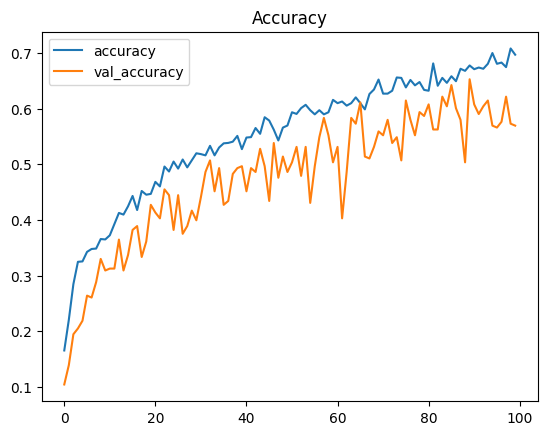

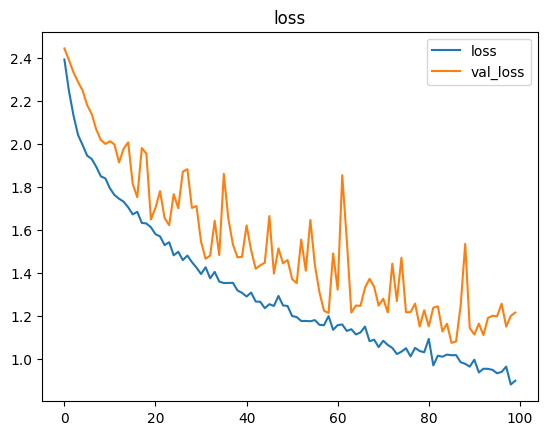

In [127]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("loss")
plt.show()

In [128]:
results = model.evaluate(test_gen, verbose=0)
print("   Test loss:  {:.5f}".format(results[0]))
print("Test Accuracy:  {:.2f}%".format(results[1] * 100))

   Test loss:  1.22422
Test Accuracy:  57.64%


In [129]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

9/9 [==============================] - 16s 2s/step


In [130]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

         ADT37       0.11      0.14      0.12        28
     Andra bpt       0.07      0.09      0.08        22
         IR 20       0.08      0.09      0.08        23
         amman       0.07      0.08      0.08        25
      eramalli       0.05      0.05      0.05        20
karuppu kavuni       0.03      0.03      0.03        30
       keerthi       0.09      0.07      0.08        29
      mtu 1010       0.23      0.15      0.18        20
      mtu 1290       0.00      0.00      0.00        24
      narmadha       0.05      0.09      0.07        22
   pacha ponni       0.06      0.05      0.05        22
   sonna masur       0.05      0.04      0.04        23

      accuracy                           0.07       288
     macro avg       0.07      0.07      0.07       288
  weighted avg       0.07      0.07      0.07       288



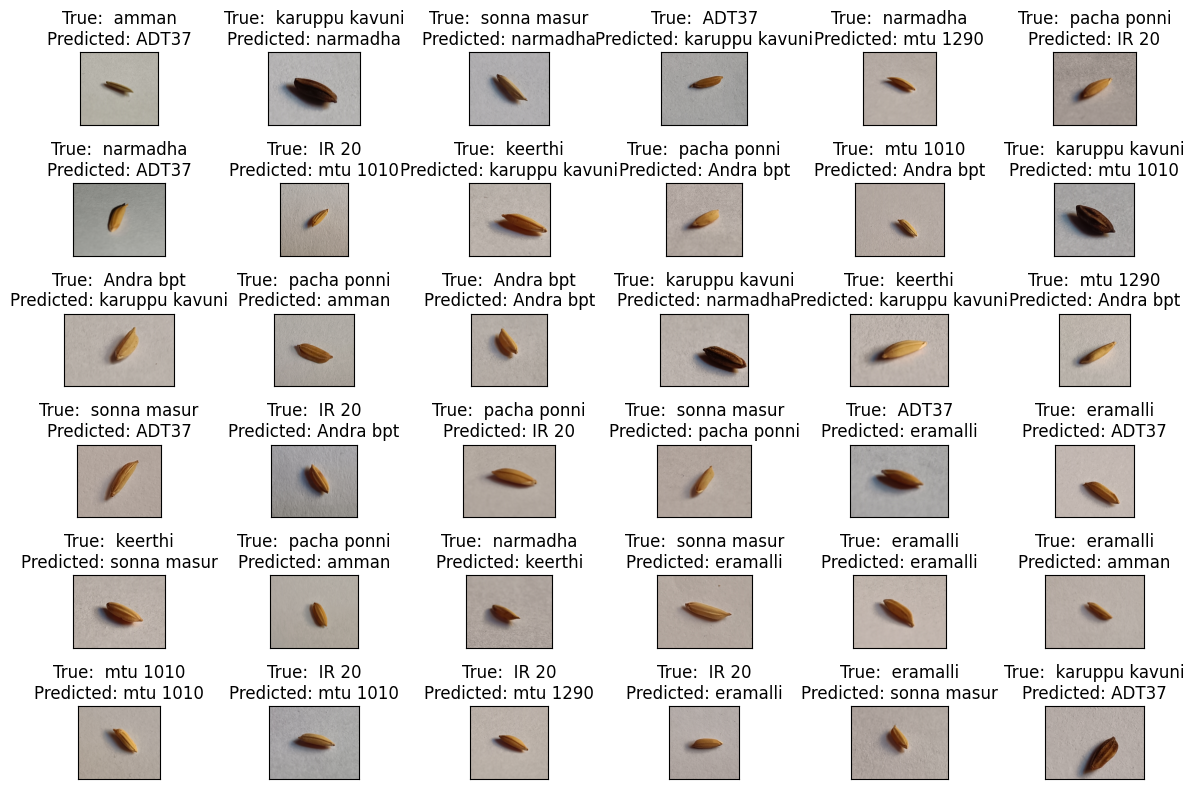

In [131]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12,8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:  {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()